# Capital One Data Science Challenge: Trips!

For this challenge, we use data collected by the New York City Taxi and Limousine Commission about Green Taxis. We use data from September 2015

## Importing required libraries for analysis

In [1]:
#Importing some libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import shapely
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint

## Question 1

** •            Programmatically download and load into your favorite analytical tool the trip data for September 2015. **

** •            Report how many rows and columns of data you have loaded.**

In [2]:
#Reading in data using pandas
data = pd.read_csv('green_tripdata_2015-09.csv')

The downloaded dataset should be placed in the working directory

### Looking at the data

In [3]:
#Looking at the data
data.info()

#Printing out the column names of the data
data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type '],
      dtype='object')

In [4]:
data.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


In [5]:
data.head(5)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [6]:
#Checking for NaNs in the data
pd.isnull(data).any()


VendorID                 False
lpep_pickup_datetime     False
Lpep_dropoff_datetime    False
Store_and_fwd_flag       False
RateCodeID               False
Pickup_longitude         False
Pickup_latitude          False
Dropoff_longitude        False
Dropoff_latitude         False
Passenger_count          False
Trip_distance            False
Fare_amount              False
Extra                    False
MTA_tax                  False
Tip_amount               False
Tolls_amount             False
Ehail_fee                 True
improvement_surcharge    False
Total_amount             False
Payment_type             False
Trip_type                 True
dtype: bool

Only the columns E_hail fee and Trip_Type seem to have nulls. E_Hail fee has a lot of nulls and trip type has 4 nulls. Will address these nulls while cleaning data

### Reporting the number of rows and columns in the loaded data

In [7]:
#Rows
print("The number of rows in this dataset is: {}".format(data.shape[0]))
#Columns
print("The number of columns in this dataset is: {}".format(data.shape[1]))


The number of rows in this dataset is: 1494926
The number of columns in this dataset is: 21


# Question 2

**•            Plot a histogram of the number of the trip distance (“Trip Distance”).**

**•            Report any structure you find and any hypotheses you have about that structure.**

### Histogram of Trip distance

In [8]:
#Looking into trip_distance data
print("Number of unique trip distances : {}".format(data.Trip_distance.nunique()))

print("Maximum trip distance: {}".format(max(data.Trip_distance)))

print("Mean trip distance: {}".format(np.mean(data.Trip_distance)))

print("Median trip distance: {}".format(np.median(data.Trip_distance)))

#Describe the trip distances
pd.DataFrame(data.Trip_distance).describe()

Number of unique trip distances : 3210
Maximum trip distance: 603.1
Mean trip distance: 2.96814085112
Median trip distance: 1.98


,Trip_distance
count,1.494926e+06
mean,2.968141e+00
std,3.076621e+00
min,0.000000e+00
25%,1.100000e+00
50%,1.980000e+00
75%,3.740000e+00
max,6.031000e+02


We can see from the above describe() function that most trip distances are very small. The median is about 2 km and the mean is 2.98Km. This leads us to think the highest point of 603 km is an outlier. In order to remove outliers, we can assume anything above 3 std above the mean as an outlier. https://docs.oracle.com/cd/E40248_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html. In this case, however, this meant that even trips with trip distances of 11 miles were being considered outliers. Since 11 miles is a reasonable trip distance (especially for airport trips ), in this case, we can remove anything above 4 standard deviations above the mean.


In [9]:
Trip_distance_withoutoutliers = data.Trip_distance[~((data.Trip_distance -data.Trip_distance.mean()).abs()  > 4*data.Trip_distance.std())]
#To check how many points were outliers
print("Number of outliers removed: {}".format(data.shape[0] - len(Trip_distance_withoutoutliers)))



Number of outliers removed: 13047


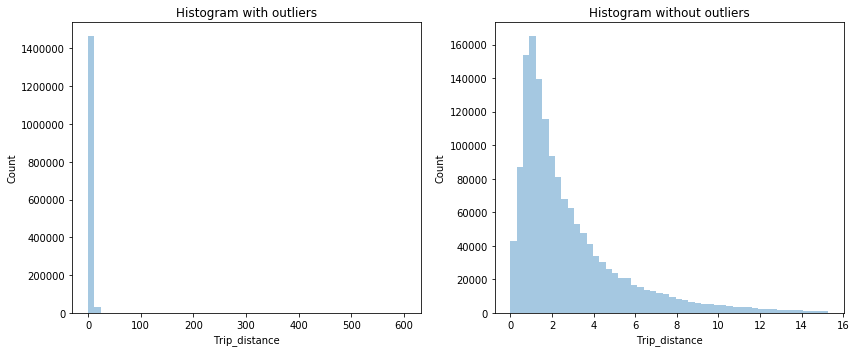

In [10]:
#Plotting the histogram of Trip Distances

f, (ax1, ax2) = plt.subplots(1,2,figsize = (12,5))
sns.distplot(data.Trip_distance, kde = False, ax= ax1)
ax1.set_title('Histogram with outliers')
ax1.set_ylabel('Count')
sns.distplot(Trip_distance_withoutoutliers, kde = False, ax = ax2)
ax2.set_title('Histogram without outliers')
ax2.set_ylabel('Count')

plt.tight_layout()

### Structure and Hypothesis

**The distribution seems to be a right skewed distribution with positive skewness. It seems to fit a lognormal distribution **

**The lognormal fit makes sense because trip distance cannot be negative**



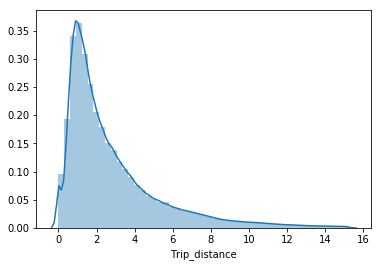

In [11]:
sns.distplot(Trip_distance_withoutoutliers, kde = True)

**The lognormal fit shows that the trip distance is not completely randomly distributed (does not follow a normal distribution). Rather people seem to take the taxi much more for short distances (below 20 km). This may tell us that people prefer to take taxis for smaller distances, and use other forms of transport for longer hauls. This is due to the fact that taxi fare is based on the distance travelled, and may get prohibitively expensive as distances increase. As distances increase, it makes more sense to use public transport/personal transport or rent transport by time. **


** Below, I look at the mean Trip distances and number of trips across hours of the day to figure out other patterns.**


In [12]:
#Finding out pickup hours for the trips to detect patterns in trip distance
import datetime
#Applying striptime to the whole series to convert to timestamps

data.lpep_pickup_datetime = map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"), data.lpep_pickup_datetime)

data.Lpep_dropoff_datetime= map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"), data.Lpep_dropoff_datetime)

#Creating pickup and dropoff hours variable

data['pickup_hour'] = map(lambda x: x.hour, data.lpep_pickup_datetime)
data['dropoff_hour'] = map(lambda x: x.hour, data.Lpep_dropoff_datetime)


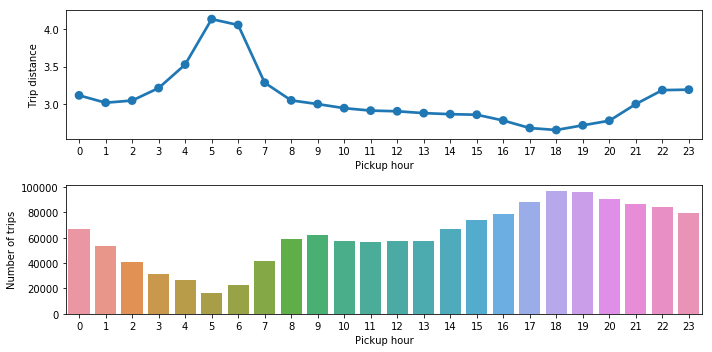

In [13]:
df = data.groupby(by = 'pickup_hour').mean().reset_index()[['pickup_hour', 'Trip_distance']]
fig, (ax0, ax1) = plt.subplots(nrows = 2, figsize = (10,5))
sns.pointplot(x = 'pickup_hour', y = 'Trip_distance', data = df, ax=ax0)
sns.countplot(x = 'pickup_hour', data = data, ax = ax1)

ax0.set_ylabel('Trip distance')
ax1.set_ylabel('Number of trips')
ax1.set_xlabel('Pickup hour')
ax0.set_xlabel('Pickup hour')

plt.tight_layout()


**We can see that trip distances are high during the early hours of the morning (peaking at 5 am), and are lowest during the rush hours both in the morning and evening. We can also see that the number of trips is highest (understandably) during the rush hours in the morning around 9 am and the evening around 6-8 pm. This shows that a lot of people seem to be taking taxis during rush hours, and these trips are usually short. This could mean that people use these taxis to travel to and from work, people prefer to take subways or other forms of transport when the roads are congested during rush hours if they have to travel long distances.  **


## Question 3

**•            Report mean and median trip distance grouped by hour of day.**

**•            We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.**

In [14]:
#Since we have pickup and drop off hours, we can group by both. They are not always equal
data[data.pickup_hour != data.dropoff_hour].shape[0]

329424

Text(0.5,1,u'Trip Distance Mean/Median by Pick-up hour')

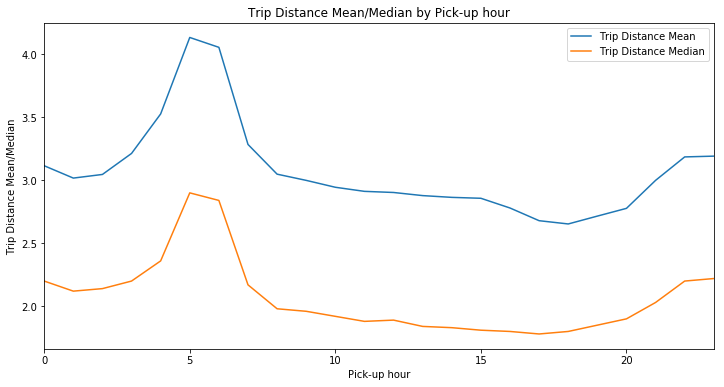

In [15]:
#Grouping trip distance by pickup hour and plotting

distance_pickuphour = pd.DataFrame(data[['Trip_distance', 'pickup_hour']].groupby(by = 'pickup_hour').mean().reset_index())

median = pd.DataFrame(data[['Trip_distance', 'pickup_hour']].groupby(by= 'pickup_hour').median())

distance_pickuphour = pd.concat([distance_pickuphour, median['Trip_distance']], axis = 1)

distance_pickuphour.columns = ['Pickup_hour', 'Trip Distance Mean', 'Trip Distance Median']

#Now plotting


fig, ax = plt.subplots(figsize = (12,6))
distance_pickuphour[['Trip Distance Mean','Trip Distance Median']].plot(ax=ax)

plt.ylabel('Trip Distance Mean/Median')
plt.xlabel('Pick-up hour')
plt.title('Trip Distance Mean/Median by Pick-up hour')

Text(0.5,1,u'Trip Distance Mean/Median by Drop-Off hour')

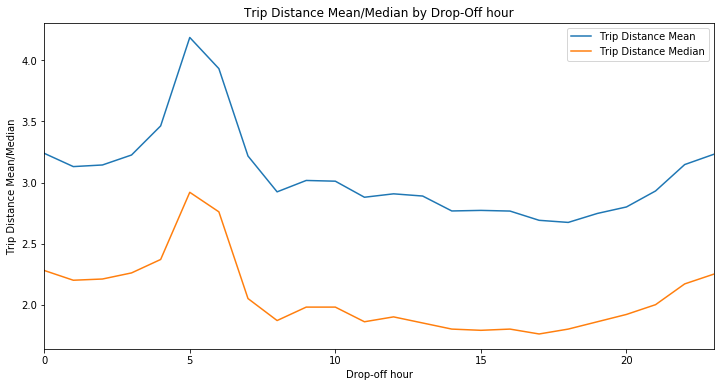

In [16]:
#Grouping trip distance by dropoff hour and plotting

distance_dropoffhour = pd.DataFrame(data[['Trip_distance', 'dropoff_hour']].groupby(by = 'dropoff_hour').mean().reset_index())

median = pd.DataFrame(data[['Trip_distance', 'dropoff_hour']].groupby(by= 'dropoff_hour').median())

distance_dropoffhour = pd.concat([distance_dropoffhour, median['Trip_distance']], axis = 1)

distance_dropoffhour.columns = ['Dropoff_hour', 'Trip Distance Mean', 'Trip Distance Median']

#Now plotting


fig, ax = plt.subplots(figsize = (12,6))
distance_dropoffhour[['Trip Distance Mean','Trip Distance Median']].plot(ax=ax)
plt.ylabel('Trip Distance Mean/Median')
plt.xlabel('Drop-off hour')
plt.title('Trip Distance Mean/Median by Drop-Off hour')

From the above graphs, we can see that the maximum trip distance seems to be travelled around 5 hours after midnight (5 am). After
this peak, the trip distance reduces, and reaches a low during the afternoon times. We can see an increase in the trip distance again towards midnight.


### Airport trips

From the dictionary of variables, we can see that the RateCodeIDs of 2 and 3 correspond to JFK and Newark respectively.

However this RateCodeID leaves out an important airport in NYC, La Guardia. 

So we can choose an area around each airport, construct polygons on shapely and go from there. We can see how many trips originate or end within these polygons to determine the total number of airport trips.
I use the  API on http://www.get-direction.com and Google Maps for the airport latitudes and longitudes, for the purpose of putting in an approximate buffer around the airports

In [17]:
#Initially using RateCodeID

is_airport = data[((data['RateCodeID'] == 2 )| (data['RateCodeID'] == 3))]

number_jfk_ewr = len(is_airport.index)

print('Number of JFK and EWR trips using RateCodeID: {}'.format(number_jfk_ewr))


Number of JFK and EWR trips using RateCodeID: 5552


The number of JFK and EWR trips using the RateCodeID field is 5552. This number seems to be low compared to the total number of taxi trips. Therefore, I decide to use Shapely for all the airports (JFK, La Guardia and EWR)

In [18]:
# La Guardia

#Choosing 4 points around LGA from google maps

lag = [(40.779077, -73.883858),(40.781669, -73.876438),(40.769749, -73.859251),
       (40.771341, -73.875344)]


poly_lag = Polygon(lag)
# Function to check if a location is located inside the boundary of La Guardia
def is_lga(loc,poly_lag = poly_lag):
    return 1*(Point(loc).within(poly_lag))

#Creating two LaGuadia Airport Variables
data['is_LGAPickup'] = data[['Pickup_latitude','Pickup_longitude']].apply(lambda x:is_lga((x[0],x[1])),axis=1)
data['is_LGADrop'] = data[['Dropoff_latitude','Dropoff_longitude']].apply(lambda x:is_lga((x[0],x[1])),axis=1)


#JFK


jfk = [(40.653420, -73.809264),(40.654266, -73.769020),(40.640388, -73.760155),
       (40.637303, -73.786279), (40.640973, -73.774311)]

poly_jfk = Polygon(jfk)
# Function to check if a location is located inside the boundary of JFK
def is_jfk(loc,poly_jfk = poly_jfk):
    return 1*(Point(loc).within(poly_jfk))

#Creating two LaGuadia Airport Variables
data['is_JFKPickup'] = data[['Pickup_latitude','Pickup_longitude']].apply(lambda x:is_jfk((x[0],x[1])),axis=1)
data['is_JFKDrop'] = data[['Dropoff_latitude','Dropoff_longitude']].apply(lambda x:is_jfk((x[0],x[1])),axis=1)


#Newark

newark = [(40.675556, -74.206971),(40.707122, -74.203244),(40.719580, -74.1593310),
       (40.714051, -74.133754), (40.690789, -74.151392)]

poly_newark = Polygon(newark)
# Function to check if a location is located inside the boundary of Newark
def is_newark(loc,poly_newark = poly_newark):
    return 1*(Point(loc).within(poly_newark))

#Creating two LaGuadia Airport Variables
data['is_NewarkPickup'] = data[['Pickup_latitude','Pickup_longitude']].apply(lambda x:is_newark((x[0],x[1])),axis=1)
data['is_NewarkDrop'] = data[['Dropoff_latitude','Dropoff_longitude']].apply(lambda x:is_newark((x[0],x[1])),axis=1)



Looking into airport trips. Creating a variable 'airport' which will help in this analysis as well as prediction in the next step. This variable denotes the total number of pickups/dropoffs at each airport
Combining all the airport variables into one variable - 'airport'. 

0: Not airport trip , 1:JFK, 2:LGA, 3:Newark. 



In [19]:
#Creating the 'airport' variable
data.loc[(data.is_JFKDrop == 1)|(data.is_JFKPickup == 1), 'airport'] = 1
data.loc[(data.is_LGADrop == 1)|(data.is_LGAPickup == 1), 'airport'] = 2
data.loc[(data.is_NewarkDrop == 1)|(data.is_NewarkPickup == 1), 'airport'] = 3
data['airport']= data['airport'].fillna(0).astype(int)


### Analysis of Airport trips

In [20]:

#How many transaction fit this criteria and the average fare for each airport
airports= ['JFK', 'LGA', 'Newark']
for i in range(1,4):
    number_of_trips = data[data.airport == i].shape[0]
    average_fare = round(data[data.airport == i]['Fare_amount'].mean(),2)
    print("The number of trips originating and terminating at {} airport are {} and the average fare is {}".format(airports[i-1], number_of_trips, average_fare))

    


The number of trips originating and terminating at JFK airport are 7814 and the average fare is 41.3
The number of trips originating and terminating at LGA airport are 16103 and the average fare is 21.04
The number of trips originating and terminating at Newark airport are 738 and the average fare is 75.68


In [21]:
#Interesting characteristics of airport trips
#First, the fare
average_fare_airport = round (data[data.airport != 0]['Fare_amount'].mean(),2)
average_fare_nonairport = round(data[data.airport == 0]['Fare_amount'].mean(),2)
print('The average airport trip fare is : {} and the average non-airport fare is {}'.format(average_fare_airport, average_fare_nonairport))

The average airport trip fare is : 29.1 and the average non-airport fare is 12.27


As we can see the average airport fare is much higher than the normal non-airport trip fare. This is understandable because airports
are typically farther away from the places of living and cost more compared to a trip to work


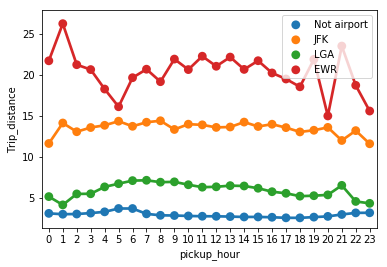

In [22]:
#Airport trip distances
#Airport trips
data_airport= data.groupby(by=['pickup_hour','airport']).mean().reset_index()

ax = sns.pointplot(x = 'pickup_hour', y = 'Trip_distance', hue = 'airport', data = data_airport)

leg_handles = ax.get_legend_handles_labels()[0]

ax.legend(leg_handles, ['Not airport', 'JFK', 'LGA', 'EWR'])


As we can see, trip distances are more across pickup hours from and to airports. Newark airport trip seem the longest, understandably.
La Guardia, being a local airport, has shorter trips, and JFK distances are between LGA and Newark

Next, I look into the tolls amounts for airport trips

In [23]:
airport_tolls = data[data.airport != 0]['Tolls_amount'].mean()
normal_tolls = data[data.airport == 0]['Tolls_amount'].mean()

print('Mean tolls to and from airports are {} and normal trips are {}'.format(airport_tolls, normal_tolls))
#Airport tolls are higher on average than normal tolls because the rides on Highways which have tolls as compared to city roads which don't

airport_tolls_ewr = data[data.airport == 3]['Tolls_amount'].mean()
print('EWR tolls are {}'.format(airport_tolls_ewr))


Mean tolls to and from airports are 1.36013871426 and normal trips are 0.102360816475
EWR tolls are 9.57487804878


EWR tolls are higher compared to other airports which makes sense since driving from NJ to NYC or vice versa involves turnpike tolls, Lincoln tunnel tolls and so on.

Finally I examine the timing of the airport rides

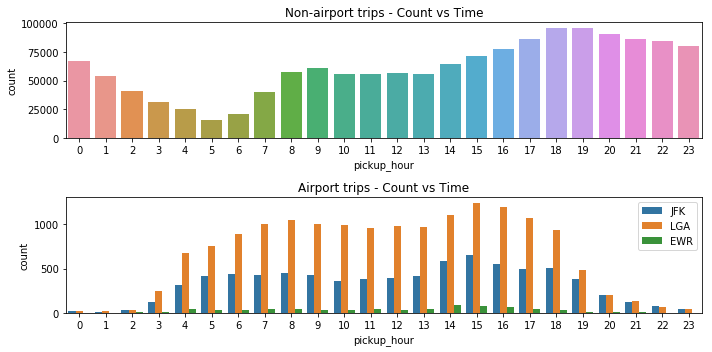

In [24]:
#Timing of airport rides
fig, (ax0, ax1) = plt.subplots(nrows = 2, figsize = (10,5))
sns.countplot(x = 'pickup_hour', data = data[data.airport == 0], ax = ax0)
sns.countplot(x = 'pickup_hour', hue = 'airport', data = data[data.airport != 0], ax= ax1)
ax0.set_title('Non-airport trips - Count vs Time')
ax1.set_title('Airport trips - Count vs Time')
ax1.legend(('JFK', "LGA", "EWR"))
plt.tight_layout()

From the above graphs we can see that the busiest times to and from the airport are not the same as rush hours for normal trips.
The trends across all airports remain the same in terms of busy times. 3 pm seems to be the busiest time for airport trips.
To make sense of trip timings, we can take JFK airport as an example. 1pm-4pm are when most Europe flights arrive at this airport. Also, 5pm - 9pm are when most Euro flights depart.
Since people usually reach airports ahead of time, the large number of trips from 2-5 pm makes sense. Similarly, most domestic and Asia-bound flights from JFK fly from 6-10 am, which justifies the large number of early morning riders we observe.

## Question 4

**•            Build a derived variable for tip as a percentage of the total fare.**

**•            Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work.**

## Data Cleaning


In [25]:
#1. Remove E_Hail fee. This column has a majority of NaNs and can be removed. 

data.drop(['Ehail_fee'], axis = 1, inplace = True)


In [26]:
#2. Trip type has 4 missing values. Replacing them by the most frequent trip type in one line

data.loc[data[pd.isnull(data['Trip_type '])].index, 'Trip_type '] = data['Trip_type '].mode()

data ['Trip_type '] = data['Trip_type '].fillna(1)

data['Trip_type '] = data['Trip_type '].astype(int)

In [27]:
#Now that the missing values have been sorted out, I look into some negative and bad values in the data frame

#3. Looking at the RateCodeID column, there seems to be an observation with a RateCode ID of 99. 

index_ratecodeid = data[~((data['RateCodeID']<=6) & (data['RateCodeID']>=1))].index

#There seem to be six observations with a rate code ID of 99. We can replace this by the most frequent value of RateCodeID

most_freq_ratecodeID = data.RateCodeID.mode()

data.loc[index_ratecodeid, 'RateCodeID'] = 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 29 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null datetime64[ns]
Lpep_dropoff_datetime    1494926 non-null datetime64[ns]
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
improvement_surcharge    1494926 non-null float64
Total_amount             14949

In [28]:
#Fare amount cannot be negative, 0 or lesser than minimum amount. The minimum amount is given in the article below

#http://nymag.com/nymetro/urban/features/taxi/n_20286/

data.loc[data[data['Fare_amount'] < 2.5].index,'Fare_amount'] = 0

#Now calculating mean values of the valid Fare amount, I have already removed the negative values in the previous step
#We can also regress the fare amounts on trip distance to figure out values for these

mean_fare = data['Fare_amount'].mean()

data.loc[data[data['Fare_amount'] == 0].index,'Fare_amount'] = mean_fare 

In [29]:
#Doing the same for total amount
data.loc[data[data['Total_amount'] < 2.5].index,'Total_amount'] = 0
mean_total_fare = data['Total_amount'].mean()
data.loc[data[data['Total_amount'] == 0].index,'Total_amount'] = mean_total_fare

data.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,...,Trip_type,pickup_hour,dropoff_hour,is_LGAPickup,is_LGADrop,is_JFKPickup,is_JFKDrop,is_NewarkPickup,is_NewarkDrop,airport
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,...,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06
mean,1.782045e+00,1.097260e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.262214e+01,3.512800e-01,...,1.022353e+00,1.353407e+01,1.347794e+01,1.391373e-04,1.072561e-02,1.177316e-04,5.192230e-03,3.010182e-05,4.909942e-04,2.825157e-02
std,4.128570e-01,6.049419e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,9.950600e+00,3.663096e-01,...,1.478286e-01,6.799624e+00,6.892356e+00,1.179483e-02,1.030077e-01,1.084978e-02,7.186984e-02,5.486432e-03,2.215296e-02,2.279452e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,-1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,...,1.000000e+00,9.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,...,1.000000e+00,1.500000e+01,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,...,1.000000e+00,1.900000e+01,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.000000e+00,6.000000e+00,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,...,2.000000e+00,2.300000e+01,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


In [30]:
#Tip amount, surcharge, Extra and Tolls amount cannot be negative. Replacing negative values of these variables with mean positive values
#Making a copy of the data at this stage
data_copy = data.copy()

amount = ['Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Extra']

for col in amount:
    data.loc[data[col] < 0, col] = data[data[col] >= 0][col].mean()
    

The data looks good now. As a final step, we can drop the Is_airport_pickup and Is_airport_dropff variables as the data is captured in the 'airport' variable

In [31]:
data.drop(['is_JFKPickup','is_JFKDrop','is_NewarkPickup','is_NewarkDrop','is_LGAPickup', 'is_LGADrop'], axis =1,inplace = True)

## Feature engineering

In this section, I add additional features to the data, which might be relevant during tip prediction

In [32]:
#Day of the trip could be a possible feature
data['Day_of_trip']  = map(lambda x:x.weekday(), data.lpep_pickup_datetime)

In [33]:
#Trip duration is another possible feature
Trip_time = (data.Lpep_dropoff_datetime - data.lpep_pickup_datetime)
data['Trip_time']= map(lambda x:round(x.total_seconds(),2), Trip_time)

Another feature could be 'is_PayDay'. I would like to look at whether people tip more on their paydays. 9/11/2015 and 9/25/2015 were paydays according to the calendar in NYC
http://www.nyc.gov/html/opa/downloads/pdf/2015_Pay_Calendar.pdf


In [34]:
day = map(lambda x: x.day,data.lpep_pickup_datetime)
indices = [i for i, x in enumerate(day) if x == 25 or x == 11]
data.loc[indices, 'is_PayDay'] = 1
data.is_PayDay.fillna(0, inplace = True)
data.is_PayDay = data.is_PayDay.astype(int)


One-hot encoding the store and forward flag

In [35]:
data['Store_and_fwd_flag']= pd.get_dummies(data.Store_and_fwd_flag, drop_first=True)

Another possible feature could indicate whether the trip was in daylight or the dark. This could be another possible feature
We can look at the pick up time of the trip for this purpose. Drop off time might be in daylight, but we want to examine when the driver picked up the passenger. 



In [36]:
hour_of_day = map(lambda x:x.hour, data.lpep_pickup_datetime)
#0-6:Dark, 7-18: Light, 18-0

light_dict = {'Dark': [0,1,2,3,4,5,6], 'Light':[7,8,9,10,11,12,13,14,15,16,17,18], 'Dark':[19,20,21,22,23]} 

data['hour_light_observed'] = hour_of_day 
 
data.loc[data.hour_light_observed > 18, 'light_during_trip'] = 0
data.loc[data.hour_light_observed <= 6, 'light_during_trip'] = 0
data.loc[(data.hour_light_observed <= 18)&(data.hour_light_observed > 6), 'light_during_trip'] = 1

data_copy = data.copy()
data.drop(['hour_light_observed'], inplace = True, axis = 1)


A very important feature which could influence tips is the **speed** of the taxi. 

In [37]:
#Adding the speed of the trip in as a feature
data['Speed'] = (data['Trip_distance']/ data['Trip_time'])*3600
data.Speed.isnull().any()

#Handling infinity and nan in speeds
data ['Speed'] = data['Speed'].replace([np.inf], np.NaN)
data['Speed'] = data['Speed'].fillna(np.mean(data['Speed']))


One feature I had tried to add was the **borough** in NYC each trip originates and ends in. However, because of time considerations, I decided against this approach. This is the code for this approach

In [38]:
#NYC Borough boundaries
#https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
# import json, requests

# with open('Borough Boundaries.geojson') as f:
#     borough_data = json.load(f)

# # Get Multipolygons using Shapely

# boroughs_nyc = {}
# for b in borough_data['features']:
#     name = b['properties']['boro_name']
#     code = b['properties']['boro_code']
#     polygons = []
#     for p in b['geometry']['coordinates']:
#         polygons.append(Polygon(p[0]))
#     boroughs_nyc[code] = {'name':name,'polygon':MultiPolygon(polygons)}
    
# #How to find boro of a given latitude longitude: Find which multipolygon it falls under
# #Manhattan:1, Staten Island: 5, Brooklyn: 2, Queens : 4, Bronx: 3

# def find_boro_name(point_input):
#     boroname = 0
#     for name,boro in boroughs_nyc.iteritems():
#         if boro['polygon'].contains(point_input):
#             boroname = name
#             break
#     return boroname

#Try to speed up processing. This is too computationally intensive. So we will do this only for the samples we finally consider
#pickup_locations = map(lambda x: find_boro_name(x), pickup_points[1:1000])
#dropoff_locations = map(lambda x: find_boro_name(x), dropoff_points[1:1000])


Feature extraction does not end here. As part of EDA, if I come across valuable features, I will add them in 

## Creating the target variable - Tip percentage

In [39]:
data['Tip_Percent'] = (data.Tip_amount/data.Total_amount)*100

count    1.494926e+06
mean     6.634262e+00
std      8.866441e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e+01
max      1.000000e+02
Name: Tip_Percent, dtype: float64

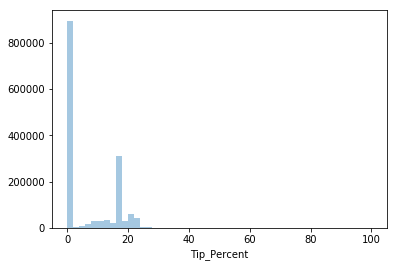

In [40]:
#Distribution of Tip percent

sns.distplot(data['Tip_Percent'], kde = False)

data['Tip_Percent'].describe()


From the histogram as well as describe() a large proportion of tips are seen to be 0%. we can count the number of 0% tips

In [41]:
#Counting the number of trips with 0% tips
from __future__ import division 
num_zero_tip = len(data[data.Tip_Percent == 0].index)
total_trips = data.shape[0]
percentage_zero_tip = 100*(num_zero_tip/total_trips)
print("Percentage of transactions with zero tip: {}".format(percentage_zero_tip))

Percentage of transactions with zero tip: 59.6789406298


We can see that a large number of transactions have no tip. We can use a Gradient Boosting Regressor or a Random forest Regressor to predict the tip percentage


### Exploratory Data Analysis

We can look at the relationship between tip percentage and pick-up hour

Text(0,0.5,u'Tip Percent')

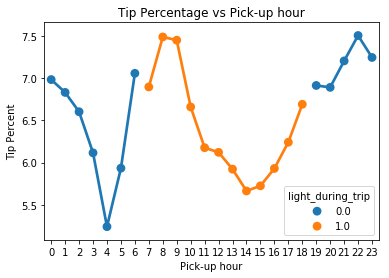

In [42]:
#Tip percentage by pick up hour
pickup_hour_mean_tip = data.groupby(['pickup_hour', 'light_during_trip']).mean()['Tip_Percent'].reset_index()
ax = sns.pointplot(x = 'pickup_hour', y = 'Tip_Percent', hue = 'light_during_trip', data = pickup_hour_mean_tip, fit_reg= False)
ax.set_title('Tip Percentage vs Pick-up hour')
ax.set_xlabel('Pick-up hour')
ax.set_ylabel('Tip Percent')

We can see that the tips seem to be on an upward trend during night. Also, tips seem to be high during morning rush hours, and relatively high during evening rush hours. It seems like people might be tipping more when they want to travel to office and so on. Tips go down once rush hour ceases. 


The mean tip percentage among the transactions which yielded a tip was 16.45


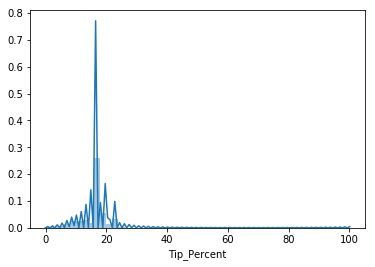

In [43]:
#Distribution of Tip Percentage

# Here, we just examine the transactions that yielded a tip
data_with_tip = data[data.Tip_amount > 0]

sns.distplot(data_with_tip['Tip_Percent'], kde= True)

print("The mean tip percentage among the transactions which yielded a tip was {}".format(round(data_with_tip.Tip_Percent.mean(),2)))



C:\Users\Madhu\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


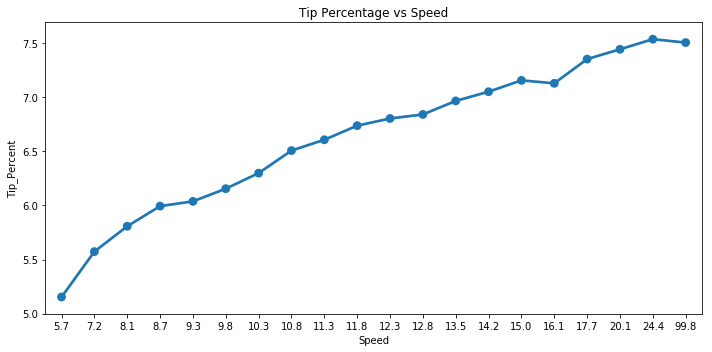

In [44]:
#Tip Percentage and Speed 
data_without_speed_outliers = data[data.Speed < 100]
data_without_speed_outliers['Speed_quantile'], edges = pd.qcut(data_without_speed_outliers.Speed, 20, retbins= True)
data_by_speed = data_without_speed_outliers.groupby(by= 'Speed_quantile').mean().reset_index()[['Speed_quantile', 'Tip_Percent']]

data_by_speed['Upper_bins'] = map(lambda x: round(x,1), edges[1:])

#Plotting speed vs tip percentage
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(x = 'Upper_bins', y = 'Tip_Percent', data = data_by_speed, ax = ax)
ax.set_title('Tip Percentage vs Speed')
ax.set_xlabel('Speed')
plt.tight_layout()


We can see that the tip percentage seems to increase with speed. This could be because people might want to reward their drivers for driving faster, till a certain point. After a certain speed is hit, the tip percents seems to start decreasing. This could be because people do not want the taxis to go too fast, and might decrease the tips if they do. Overall, there seems to exist a strong relationship between the tip percentage and speed

Next we can examine the relationship between Tip Percentage and Payment type

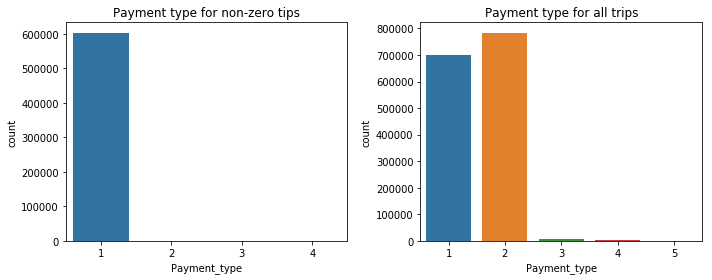

In [45]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows = 1, figsize = (10,4))
sns.countplot(x = 'Payment_type', data = data[data.Tip_amount>0], ax = ax1)
sns.countplot(x = 'Payment_type', data = data, ax = ax2)
ax1.set_title('Payment type for non-zero tips')
ax2.set_title('Payment type for all trips')
plt.tight_layout()


Here, 1: Credit card, 2: Cash, 3: No charge, 4: Dispute, 5: Unknown

One observation is that almost all the transactions which include tips have been done using credit cards. Though a large number of payments have been made using cash, not many of these yielded a tip. This shows that the payment type could be a very important indicator of tip percentage, with credit card transactions having a large proportion of non-zero tips. One reason for this could be that drivers might not have recorded cash tips in the system, whereas tips using credit cards are automatically entered in the system

Another important feature could be the **fare** amount

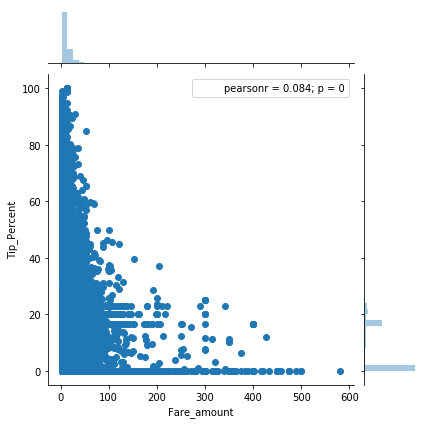

In [46]:
#Plot of fare amount vs tips.
sns.jointplot(x = 'Fare_amount', y = 'Tip_Percent', data = data)

Tip percent decrease as fare increases. One reason could be that people probably do not want to pay large tips on top of high fares. Also, some people may pay the same tip amount each time, and the tip percent seems high when the fare is smaller as compared to tips on large fares for the same tip

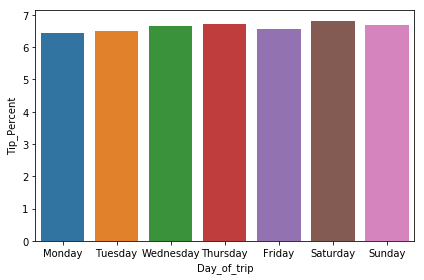

In [47]:
#Day of week vs Tip Percentage
Tip_By_Day = data.groupby(by = ['Day_of_trip']).mean().reset_index()
Tip_By_Day
day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
Tip_By_Day['Day_of_trip']= Tip_By_Day['Day_of_trip'].map(day_dict)

sns.barplot(x = 'Day_of_trip', y = 'Tip_Percent', data = Tip_By_Day)
plt.tight_layout()

As expected, the tip percentages seem slightly higher on weekends

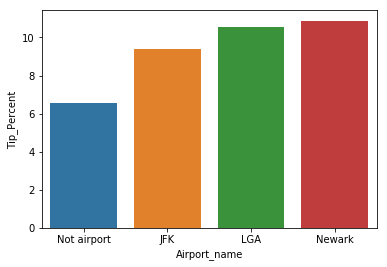

In [48]:
#Airports

airport_tip_data = data.groupby(by= 'airport').mean().reset_index()[['airport', 'Tip_Percent']]
airport_dict = {0:'Not airport', 1:'JFK', 2:'LGA', 3:'Newark'}
airport_tip_data['Airport_name']= airport_tip_data['airport'].map(airport_dict)

sns.barplot(x = 'Airport_name', y = 'Tip_Percent', data = airport_tip_data)

We can see that airport rides seem to have more tips compared to non-airport rides. So this variable is correlated with tip_percent

Finally, we can study the **correlations** between the variables and the target variable, as well as between variables using a heatmap


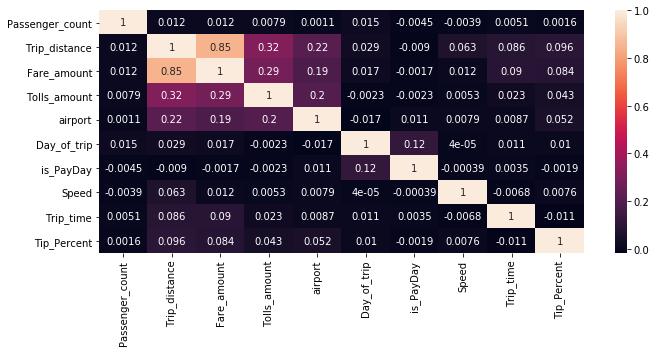

In [49]:
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(data[['Passenger_count', 'Trip_distance', 'Fare_amount', 'Tolls_amount', 'airport','Day_of_trip', 'is_PayDay','Speed', 'Trip_time','Tip_Percent']].corr(), annot = True, ax = ax)
plt.tight_layout()


There seem to be a few major correlations between the variables. First, between Trip distance and Fare amount, which is to be expected. While selecting features to build the final model, it would be adequate to use just the Fare amount as a feature

## Building the model

### K-Fold Cross validation

We need to build a regression model for predicting the tip percentage. As the first step in this process, I perform K-fold cross validation to select a model which has a high accuracy. For this step, I consider three potential models - A Lasso regressor, Gradient Boosting Machine using the XGBoost library and a Random Forest Regressor

I consider only a subset of the training set (50000 samples) to save time

In [50]:
#Importing the required models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import xgboost
from xgboost import XGBRegressor

from sklearn.cross_validation import train_test_split

#Removing datetime so regression can happen

data.drop(['lpep_pickup_datetime','Lpep_dropoff_datetime'], inplace = True, axis = 1)


#Sample data for K-Fold cross validation
data_class = data.loc[np.random.choice(data.index,size=50000,replace=False)]
X = data_class.drop(['Tip_Percent', 'Tip_amount'], axis = 1)
y = data_class['Tip_Percent']


C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Lasso: 0.766932 (0.010198)
GBM: 0.849331 (0.008350)
RF: 0.971402 (0.011640)


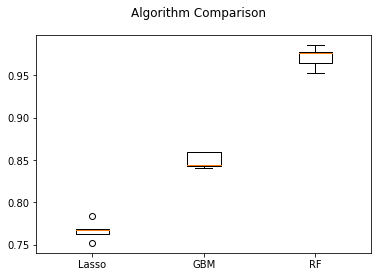

In [51]:

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
seed = 7
scoring = 'r2'
models = []
models.append(('Lasso',  Lasso(alpha = 0.1)))
models.append(('GBM', XGBRegressor()))
models.append(('RF', RandomForestRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



     # Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



**Random forest regressor** seems to have the highest accuracy. I will use a Random Forest Regressor to predict the tip percentage.  

### Feature importance
I will use a random forest regressor to derive the feature importance and use the top 10 features in my final model

In [52]:
#Feature importance
rf = RandomForestRegressor() 
## Fit the model on your training data.
rf.fit(X, y) 
feature_importances = pd.DataFrame(rf.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending = False).reset_index()                             

features = X.columns
feature_importance = rf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize = (10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

feature_importances

NameError: name 'importances' is not defined

Based on the above feature importance figures, I can pick up ten important features. These are - Payment_type, Total_amount, Fare_amount,Dropoff_latitude,Extra, Trip_time, Trip_distance, Speed, Dropoff_longitude, Tolls_amount. Since we saw that there was a high correlation between the Trip Distance and Fare amount, I will use only the Fare amount as a feature for tip prediction.

At this point, I use the **entire dataset** for my prediction

In [ ]:
#Creating a dataframe with these 9 important features. 
data_final_features = data [['Payment_type', 'Total_amount', 'Fare_amount','Dropoff_latitude','Extra', 'Trip_time', 'Speed', 'Dropoff_longitude', 'Tolls_amount', 'Tip_Percent']]
X_final_features = data_final_features.drop(['Tip_Percent'], axis = 1)
y_final_features = data_final_features['Tip_Percent']

### GridSearch CV for Hyperparameter optimization

To choose the number of estimators in the Random forest Regression model, we can use Grid Search CV

In [ ]:
#Creating the training and testing sets using train_test_split. The test_size is 0.2 as the test sample is 20% of the total samples
X_train, X_test, y_train, y_test = train_test_split(X_final_features,y_final_features, test_size = 0.2, random_state = 42)

from sklearn.model_selection import GridSearchCV

#Parameter grid - Tuning number of trees, max features
param_grid = {'n_estimators': [10, 15, 20]}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

### Getting the final model 

In [ ]:
#Getting the optimized random forest after hyperparameter optimization

optimized_rf = grid_search.best_estimator_



### Performance of the model

#### R^2 of the model

In [ ]:
#Predictions from the model for the test set
from sklearn import metrics
y_pred = optimized_rf.predict(X_test)
r_squared = metrics.r2_score(y_test, y_pred)
print("The R-Squared of the model is {}".format(r_squared))


#### MSE of the final model

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse_train = metrics.mean_squared_error(y_train, optimized_rf.predict(X_train))
print("The Mean Squared Error of the model on the test set is {}".format(mse))
print("The Mean Squared Error of the model on the training set is {}".format(mse_train))

The Mean Squared Error of the model on the training and test set are small, and this is a a good indicator

#### Scatter plot of Actual vs Predicted values

In [ ]:
plt.scatter(x = y_test, y= y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Tip percentage - Actual vs Predicted values')


## Conclusion

The above Random Forest Regression model is very highly accurate, as can be seen from the **R^2 of 0.997**. The mean square error of this model is also very small. The scatter plot of the actual vs predicted tip percentage values show that all the points are very close to the regressed diagonal line. From these key performance metrics, we can say that the model is very successful in predicting the Tip Percentages using New York Green Taxi data

## Question 5
**•            Option A: Distributions**

**•            Build a derived variable representing the average speed over the course of a trip.**

**•            Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?**

**•             Can you build up a hypothesis of average trip speed as a function of time of day?**

I have already created the derived variable **Speed**, which was instrumental in the prediction of the tip percentage

### Test to determine if average speeds were materially the same across all weeks of September

In [ ]:
# Using the copy of the data which was created earlier to derive the 'Week' variable from the pickup and dropff datetime

speed_by_time = pd.DataFrame(columns = ['lpep_pickup_datetime', 'Lpep_drop_datetime','Overall_Week','Week','Hour_of_day','Speed'])
speed_by_time.lpep_pickup_datetime = data_copy.lpep_pickup_datetime
speed_by_time.Lpep_drop_datetime = data_copy.Lpep_dropoff_datetime
#Getting the week 
speed_by_time['Overall_Week'] = map(lambda x: x.week, speed_by_time.lpep_pickup_datetime)
speed_by_time['Hour_of_day'] = map(lambda x: x.hour, speed_by_time.lpep_pickup_datetime)
speed_by_time['Speed'] = data['Speed']

In [ ]:
#Removing outliers in Speed. Speeds cannot be very high, as the speed limit in NYC was 25 mph in 2015
speed_by_time = speed_by_time[speed_by_time.Speed < 100]



In [ ]:
speed_by_time.loc[speed_by_time.Overall_Week == 36, 'Week'] = 1
speed_by_time.loc[speed_by_time.Overall_Week == 37, 'Week'] = 2
speed_by_time.loc[speed_by_time.Overall_Week == 38, 'Week'] = 3
speed_by_time.loc[speed_by_time.Overall_Week == 39, 'Week'] = 4
speed_by_time.loc[speed_by_time.Overall_Week == 40, 'Week'] = 5


In [ ]:
speed_week1 = speed_by_time.loc[speed_by_time.Week == 1, 'Speed'].values
speed_week2 = speed_by_time.loc[speed_by_time.Week == 2, 'Speed'].values
speed_week3 = speed_by_time.loc[speed_by_time.Week == 3, 'Speed'].values
speed_week4 = speed_by_time.loc[speed_by_time.Week == 4, 'Speed'].values
speed_week5 = speed_by_time.loc[speed_by_time.Week == 5, 'Speed'].values

**To determine if the average speeds are materially the same across the weeks of September, we can perform a Oneway ANOVA
test**


In [ ]:
#Performing the ANOVA test
import scipy.stats as stats
stats.f_oneway(speed_week1, speed_week2, speed_week3, speed_week4, speed_week5)

### Conclusion from the ANOVA test

As the p-value is very small (0), we can **definitely reject the null hypothesis**.Therefore, the average speeds are materially **different** across the weeks of September.

In [ ]:
#More graphs to prove this point
fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1,5, figsize = (20,4))
sns.distplot(speed_week1, ax = ax0, kde = False)
sns.distplot(speed_week2, ax = ax1, kde = False)
sns.distplot(speed_week3, ax = ax2, kde = False)
sns.distplot(speed_week4, ax = ax3, kde = False)
sns.distplot(speed_week5, ax = ax4, kde = False)
ax0.set_xlabel('Speed - Week 1')
ax1.set_xlabel('Speed - Week 2')
ax2.set_xlabel('Speed - Week 3')
ax3.set_xlabel('Speed - Week 4')
ax4.set_xlabel('Speed - Week 5')

In [ ]:
#Finding the mean speeds across the weeks of September 2015

mean_week_list = [np.mean(speed_week1), np.mean(speed_week2), np.mean(speed_week3), np.mean(speed_week4), np.mean(speed_week5)]
for i in range(0,len(mean_week_list)):
    print("Average speed in week {}: {}".format(i+1, mean_week_list[i]))

We can see that the average speed decreased from Week 1 to 2 and stayed almost the same in Week 3. After this, the speed increased in Week 4 , finally dropping to the lowest speed among all the weeks in Week 5

#### Hypothesis for differing mean speeds across the weeks of September 2015

Speed can be different on different weeks because of factors like **important events** happening in NYC around different weeks of September
One example of this is the US Open which was hosted in NYC in September 2015. It continued till 13th September. This might have let to the congestion of roads as more people travel to NYC to watch this event and avail taxis, and hence taxi speeds could have decreased towards the end of the event, around the second week.

Another key factor which could be influencing the taxi speeds is the **weather** across the weeks of September 2015 in NYC. The following website details the weather across the weeks of September 2015:
http://www.weathergamut.com/2015/10/01/nyc-monthly-summary-september-2015/

As we can see, in weeks in which heavy rainfall was recorded, we can see lesser average taxi speeds, probably because drivers want to drive more safely in bad weather and rain. In weeks in which the weather was sunny, like the first and fourth week, speeds appear to be more.

<img src="September_Weeks_Rainfall.png">

### Average Trip Speed as a function of the time of day

In [ ]:
speed_by_time['pickup_hour'] = data.pickup_hour
#Group by pickup hour
time_speed = []

for i in range (0, 24):
    speed_array = speed_by_time.loc[speed_by_time.pickup_hour == i, 'Speed'].values
    time_speed.append(speed_array)
    

In [ ]:
#Performing one way ANOVA test again, across hours of the day
stats.f_oneway(time_speed[0],time_speed[1],time_speed[2],time_speed[3],time_speed[4], time_speed[5], time_speed[6],
              time_speed[7],time_speed[8], time_speed[9], time_speed[10], time_speed[11], time_speed[12],time_speed[13],time_speed[14],
              time_speed[15],time_speed[16], time_speed[17], time_speed[18], time_speed[19], time_speed[20], time_speed[21], time_speed[22],
              time_speed[23])

Again, the zero p-value indicates that we can reject the null hypothesis and conclude that the speed varies materially across the time of the day

In [ ]:
#Means of speeds across hours of the day
mean_speeds = []
for i in range(0, 24):
    print('Mean speed at hour {} : {}'.format(i, round(np.mean(time_speed[i]),2)))
    mean_speeds.append(np.mean(time_speed[i]))
#Morning speed > Evening Speed. (maybe because of light, passengers might want to travel slower at night). Evening rush hour speed is very low. Probably due to traffic.
#Early morning speeds are very high. This is probably because the roads are less crowded in the mornings so cars can travel faster. (People going to airport?)
Mean_speed_timeofday  = map(np.mean, time_speed)


In [ ]:
sns.pointplot(x = range(0,24), y = Mean_speed_timeofday)
plt.xlabel('Hour of day')
plt.ylabel('Mean Speed (in mph)')
plt.title('Speed across times of the day')

speed_by_time.boxplot('Speed','pickup_hour')
plt.ylim(1, 50)
plt.tight_layout()

#### Hypothesis of varying speed across times of day



#### • Effect of rush hours on speeds

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,6))
sns.pointplot(x = range(0,24), y = Mean_speed_timeofday, ax = ax1)
ax1.set_xlabel('Hour of day')
ax1.set_ylabel('Mean Speed (in mph)')
ax1.set_title('Speed across times of the day')
sns.countplot('pickup_hour', data = data, ax = ax2)
ax2.set_xlabel('Hour of day')
ax2.set_ylabel('Number of trips')
ax2.set_title('Number of trips across the hours of the day')

plt.tight_layout()


We can very clearly see the effect of rush hours on speeds. The average speed is very low during the morning rush hours (8-10 am) and during the evening rush hours (5-7 pm). This might be because a lot of people will be travelling to and from work during these times, and so the roads might be very congested. Therefore, the average speed decreases. <br>

During the less busy afternoon hours, the speed slowly picks from the morning rush hour speed only to decrease again towards the evening rush hour. <br>

As night approaches, the roads clear out again, and the speeds pick up 

The highest speeds seem to occur at 5 am in the morning. We can see that this is also the time when the least number of trips occur. Therefore the roads are very empty and people can travel faster

• Second, the speeds during morning are greater than the evening and night speeds. This might probably be because of **greater visibility** in the morning and passengers wanting to travel slower at night to be safe


#### Effect of airport trips

As a part of the answer for question 3, we could see that a lot of airport trips are undertaken early in the morning around 5 am in NYC. <br>

Since airport trips are mostly along highways and Freeways, the average speed of these trips might be much higher than normal trips. Since many of these trips are around 5 am, we might be seeing higher speeds at this time. The figures below illustrate this fact



In [ ]:

normal_trip_speed = round(data[data.airport == 0]['Speed'].mean(),2)

airport_trip_speed = round(data[data.airport != 0]['Speed'].mean(),2)

print('The average non-airport trip speed is {} and the average airport trip speed is {}'.format(normal_trip_speed, airport_trip_speed))

### Conclusion

To conclude, mean speeds seem to differ materially across the weeks of September as well as the time of the day. The above hypotheses explain these material differences.
